# 주제: 나랑 닮은 연예인을 찾아보자

## 데이터
내 사진 8장(주의: 상기 이미지는 실물과 다를 수 있습니다), 여러 연예인의 사진들

## 목표
1. 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 정렬
2. 다양한 탐색을 통해 내 사진과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아내기
3. matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현

## (1) 라이브러리 및 데이터 불러오기

In [96]:
import face_recognition
import numpy as np
import PIL
import os
%matplotlib inline
import matplotlib.pyplot as plt

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


In [97]:
celebrity_picture_path = os.getenv("HOME") + "/aiffel/celebrity_lookalike/celebrity_picture"

In [98]:
my_picture_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/my_picture'

## (2) 얼굴 영역 자르기

In [99]:
def get_cropped_face(image_path):
    # [[YOUR CODE]]
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

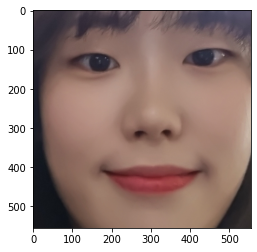

In [100]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/my_picture/img03.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

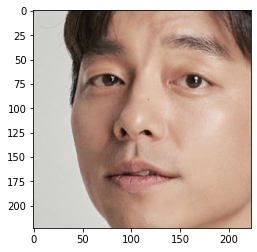

In [101]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/celebrity_picture/공유.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## (3) 얼굴 영역 임베딩 추출하기

In [102]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [106]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        if os.path.isdir(img_path):  # 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어감
            continue
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [107]:
my_picture_embedding_dict = get_face_embedding_dict(my_picture_path)
my_picture_embedding_dict['img03']

array([-6.27523735e-02,  7.81522840e-02,  4.24649417e-02, -8.85888562e-02,
       -1.19298048e-01, -7.82214105e-03, -7.03725517e-02, -6.92857280e-02,
        1.52009666e-01, -1.29517674e-01,  1.91215590e-01, -7.21793398e-02,
       -2.57165849e-01, -4.37818021e-02, -1.03453346e-01,  2.52420455e-01,
       -1.46270901e-01, -1.62632376e-01, -4.36947793e-02,  1.41014364e-02,
        1.10318787e-01,  2.78104413e-02,  1.68354567e-02,  6.89424351e-02,
       -1.00015193e-01, -2.88062245e-01, -1.15469262e-01, -1.35304518e-02,
       -4.79521714e-02, -1.18028961e-01, -3.04763131e-02,  7.82705098e-02,
       -1.58255816e-01,  3.17975134e-03,  1.59374513e-02,  9.68458876e-02,
       -4.56990376e-02, -1.21594407e-01,  1.50583923e-01,  1.51613560e-02,
       -2.78086483e-01,  5.45431264e-02,  5.46445251e-02,  2.51174271e-01,
        1.97100356e-01, -3.42224091e-02,  1.11080222e-02, -1.70631573e-01,
        7.56551176e-02, -1.90509707e-01, -1.17337536e-02,  1.69174165e-01,
        3.25039476e-02,  

In [108]:
celebrity_embedding_dict = get_face_embedding_dict(celebrity_picture_path)
celebrity_embedding_dict['태연']

array([-0.05832611,  0.08650121,  0.09609314, -0.08645427, -0.04536815,
        0.00911583, -0.09041593, -0.083923  ,  0.13654682, -0.16282591,
        0.23101933, -0.06544134, -0.22658628, -0.0451633 , -0.05203072,
        0.19644116, -0.17820568, -0.14273839, -0.03521199,  0.02405678,
        0.10089701,  0.07277459, -0.01784261,  0.01457554, -0.12162289,
       -0.30795228, -0.09869153, -0.027395  , -0.04413068, -0.10291066,
       -0.05202296,  0.06361919, -0.18417709,  0.02716298, -0.00758901,
        0.12781557,  0.00935094, -0.08867297,  0.14594853,  0.01699896,
       -0.28937352,  0.10548922,  0.02909858,  0.23222357,  0.16457024,
       -0.03816761, -0.01715928, -0.1753045 ,  0.08326229, -0.13974187,
        0.03850684,  0.16461825,  0.06933422,  0.06771764,  0.00946827,
       -0.11631443,  0.03686657,  0.08126064, -0.12411997, -0.03522221,
        0.09706895, -0.08108591,  0.03647789, -0.10451367,  0.11921875,
        0.05328177, -0.08073267, -0.23669644,  0.09432068, -0.15

## (4) 내 사진끼리 비교하기

In [109]:
def get_distance(name1, name2):
    return np.linalg.norm(my_picture_embedding_dict[name1]-my_picture_embedding_dict[name2], ord=2)

get_distance('img01', 'img02')

0.32396804225658044

In [110]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [111]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(my_picture_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [112]:
get_nearest_face('img01', 7)

순위 1 : 이름(img03), 거리(0.2881872361309339)
순위 2 : 이름(img08), 거리(0.2888692459274187)
순위 3 : 이름(img06), 거리(0.2937916241204757)
순위 4 : 이름(img02), 거리(0.32396804225658044)
순위 5 : 이름(img07), 거리(0.37703502526150745)
순위 6 : 이름(img04), 거리(0.4269357668660581)
순위 7 : 이름(img05), 거리(0.44056982839943604)


-> img01과 같은 날, 같은 필터를 사용한 img03이 가장 거리가 가깝게 나왔다. img08과 img06은 img01과 다른 날이지만 같은 필터를 사용하여 비슷한 구도로 찍은 사진이며 img02는 같은 날이지만 다른 필터를 사용한 사진이다. 이를 통해 필터 혹은 구도가 이미지 거리에 영향을 준다는 것을 알 수 있다. 그리고 img04와 img07은 안경을 쓴 사진인데 확실히 안경을 쓴 사진과 안경을 쓰지 않은 사진의 차이가 가장 큰 것 같다. 이러한 결과를 통해 라이브러리face_recognition의 성능에 신뢰가 감을 알 수 있다.

## (5) 내 사진과 모든 연예인의 사진 비교하기

In [113]:
def get_distance(name1, name2):
    return np.linalg.norm(celebrity_embedding_dict[name1]-celebrity_embedding_dict[name2], ord=2)

In [114]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [115]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(celebrity_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [117]:
get_nearest_face('img01', 10)

순위 1 : 이름(img03), 거리(0.2881872361309339)
순위 2 : 이름(img08), 거리(0.2888692459274187)
순위 3 : 이름(img02), 거리(0.32396804225658044)
순위 4 : 이름(우기), 거리(0.36506226860284224)
순위 5 : 이름(img07), 거리(0.37703502526150745)
순위 6 : 이름(사쿠라), 거리(0.39618010789249514)
순위 7 : 이름(트와이스모모), 거리(0.3965089590231126)
순위 8 : 이름(비니), 거리(0.3969296865388473)
순위 9 : 이름(공효진), 거리(0.40196412015891037)
순위 10 : 이름(아이즈원조유리), 거리(0.40228998272179495)


-> 우기를 굉장히 좋아하는데 닮은 꼴로 나와서 기분이 매우 좋다. 이 결과에서도 top10에 안경을 쓴 사진이 나오지 않는 것을 통해 안경의 유무가 컴퓨터에게도 큰 영향을 끼친다는 것을 알 수 있었다.

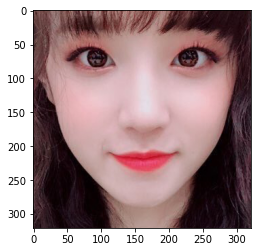

In [118]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/celebrity_picture/우기.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

-> 이쯤에서 보는 우기 얼굴... 아주 예쁘다

## (6) 재밌고 다양한 시각화 시도하기

# 프로젝트 회고

## 배운점
1. 에러1: 모든 파일을 임베딩하는 부분에서 out of range 에러가 떴다. 문제가 있었던 get_cropped_face함수 안에 print(image) 코드를 넣어 어디에서 오류가 발생하였는지 원인을 확인하였다. 산들.ipeg가 어떤 이유에서 cropped이 되지 않는 현상을 발견하였다. 정확한 이유는 더 조사해 보아야겠지만 그 파일을 지우고 나니 새로운 에러가 떴다.
2. 에러2: [Errno 21] Is a directory: '/aiffel/aiffel/celebrity_lookalike/celebrity_picture/.ipynb_checkpoints' 에러가 떴다. 이 에러는 파일을 처리하는 과정에서 디렉토리가 발견되어 뜨는 오류다. 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어가는 코드를 추가 작성하니 해결되었다!

## 아쉬운점

## 종합평가

# Reference

5. 점프 투 플라스크  
https://wikidocs.net/81088  
6. tkinter 라이브러리 사용  
https://wikidocs.net/132610  